Импорт

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Векторизуем данные

In [3]:
data = pd.read_csv('cleaned_dataset.csv')


In [4]:
lemmatizer = WordNetLemmatizer()
stp_words = stopwords.words('english')
def clean(text):
  text = re.sub(r'[^\w\s]','',text, re.UNICODE)
  text = text.replace('''<br /><br />''', '')
  text = text.lower()
  text = [lemmatizer.lemmatize(token, "n") for token in text.split(" ")]
  text = [lemmatizer.lemmatize(token, "v") for token in text]
  text =" ".join(word for word in text if word not in stp_words)
  return text

In [5]:
#data['Review'] = data['Review'].apply(clean)

In [6]:
tv = TfidfVectorizer(max_features = 5000)
X = tv.fit_transform(data['Review']).toarray()
Y = data['Sentiment']

In [7]:
#import joblib
#import pickle
#import gzip
#joblib.dump(tv, 'vectorizer_random_forest.pkl', compress=True)

Делим на обучающую и тестовую выборки

In [8]:
x_train ,x_test,y_train,y_test=train_test_split(X,Y,
                                                test_size=0.20 ,
                                                random_state=42)

Тренируем модель логической регрессии

In [9]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Распределение правильных и ложных прогнозов

In [10]:
pred = model.predict(x_test)

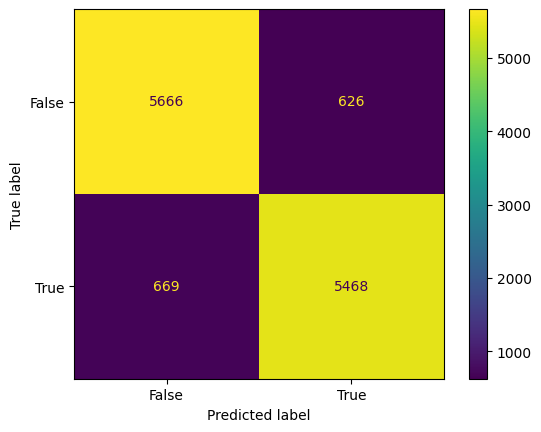

In [11]:
cm = metrics.confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [12]:
metrics.accuracy_score(y_test, pred)

0.8958081905221659

In [13]:
metrics.f1_score(y_test, pred)

0.8941214945629956

In [14]:
metrics.precision_score(y_test, pred)

0.8972760091893666

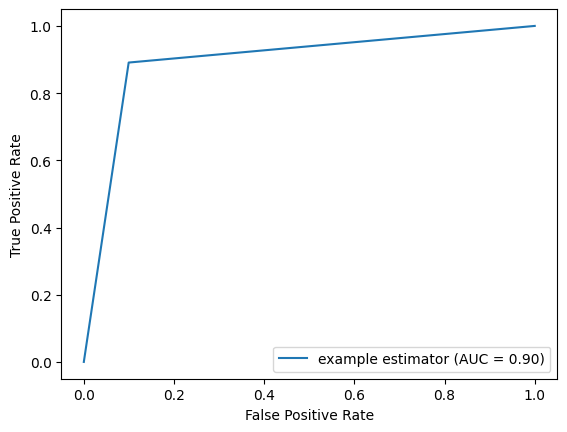

In [15]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [16]:
#joblib.dump(model, 'random forest.joblib')